# Phase 3 Code Challenge

This assessment is designed to test your understanding of Module 3 material. It covers:

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

_Read the instructions carefully_. You will be asked both to write code and to answer short answer questions.

## Code Tests

We have provided some code tests for you to run to check that your work meets the item specifications. Passing these tests does not necessarily mean that you have gotten the item correct - there are additional hidden tests. However, if any of the tests do not pass, this tells you that your code is incorrect and needs changes to meet the specification. To determine what the issue is, read the comments in the code test cells, the error message you receive, and the item instructions.

## Short Answer Questions 

For the short answer questions...

* _Use your own words_. It is OK to refer to outside resources when crafting your response, but _do not copy text from another source_.

* _Communicate clearly_. We are not grading your writing skills, but you can only receive full credit if your teacher is able to fully understand your response. 

* _Be concise_. You should be able to answer most short answer questions in a sentence or two. Writing unnecessarily long answers increases the risk of you being unclear or saying something incorrect.

In [2]:
# Run this cell without changes to import the necessary libraries
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number

---
## Part 1: Gradient Descent [Suggested Time: 20 min]
---
In this part, you will describe how gradient descent works to calculate a parameter estimate. Below is an image of a best fit line from a linear regression model using TV advertising spending to predict product sales.

![best fit line]1

This best fit line can be described by the equation $y = mx + b$. Below is the RSS cost curve associated with the slope parameter $m$:

![cost curve](https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_3/cost_curve.png)

where RSS is the residual sum of squares: $RSS = \sum_{i=1}^n(y_i - (mx_i + b))^2$ 

### 1.1) Short Answer: Explain how the RSS curve above could be used to find an optimal value for the slope parameter $m$. Your answer should provide a one sentence summary, not every step of the process.

# Your answer here

### by looking at the lowest point on the curve as thats where the RSS is small

Below is a visualization showing the iterations of a gradient descent algorithm applied the RSS curve. Each yellow marker represents an estimate, and the lines between markers represent the steps taken between estimates in each iteration. Numeric labels identify the iteration numbers.

![gradient descent](https://raw.githubusercontent.com/learn-co-curriculum/dsc-cc-images/main/phase_3/gd.png)

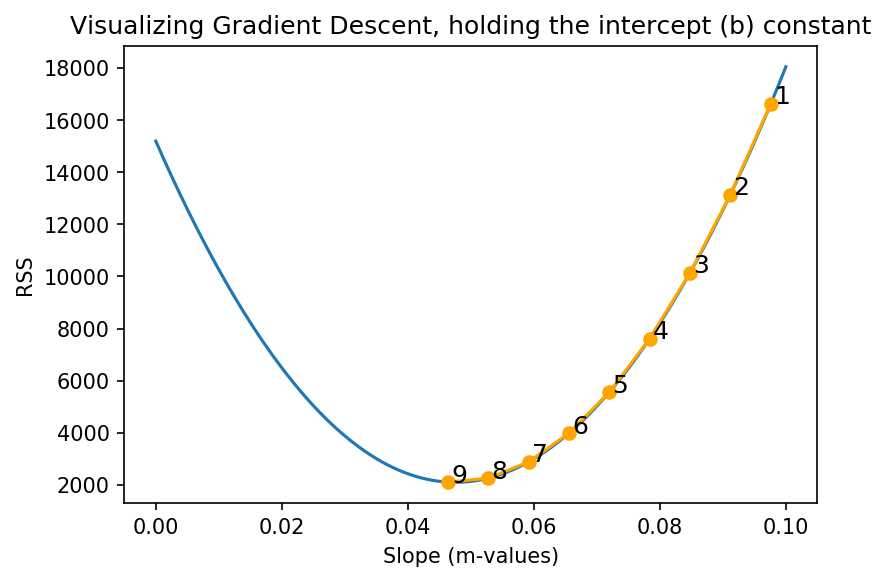![image.png](

### 1.2) Short Answer: Explain why the distances between markers get smaller over successive iterations.

# Your answer here

#### as the gradient approaches the minimum RSS, the changes we need to make get smaller, so each step becomes shorter

### 1.3) Short Answer: What would be the effect of decreasing the learning rate for this application of gradient descent?

# Your answer here

#### If we make the learning rate smaller, the steps will be slower and smaller. It might take longer to reach the best point, but it will prevent overshooting

---
## Part 2: Logistic Regression [Suggested Time: 15 min]
---
In this part, you will answer general questions about logistic regression.

### 2.1) Short Answer: Provide one reason why logistic regression is better than linear regression for modeling a binary target/outcome.

# Your answer here
#### Logistic regression gives probablities between 0 and 1 unlike linear regression which could give a negative number or a number greater than 1


### 2.2) Short Answer: Compare logistic regression to another classification model of your choice (e.g. Decision Tree). What is one advantage and one disadvantage logistic regression has when compared with the other model?

# Your answer here
#### Advantage: logistic regression is easier to interpret with clear coefficients e.g, knowing exactly how much the price increase of a product affects a customer's decision to buy

#### Disadvantages: It may find it difficult to model complex relationships compared to decision trees


---
## Part 3: Classification Metrics [Suggested Time: 20 min]
---
In this part, you will make sense of classification metrics produced by various classifiers.

### 3.1) Create a numeric variable `precision` containing the precision of the classifier.

The confusion matrix below represents the predictions generated by a classisification model on a small testing dataset.

![cnf matrix](https://curriculum-content.s3.amazonaws.com/data-science/images/cnf_matrix.png)

In [3]:
# CodeGrade step3.1
# Replace None with appropriate code

precision = 30 / (30 + 4) 


In [4]:
# This test confirms that you have created a numeric variable named precision

assert isinstance(precision, Number)

### 3.2) Create a numeric variable `f1score` containing the F-1 score of the classifier.

In [5]:
# CodeGrade step3.2
# Replace None with appropriate code
recall = 30 / (30 + 12 )
f1score = 2 * (precision * recall) / (precision + recall)

In [6]:
# This test confirms that you have created a numeric variable named f1score

assert isinstance(f1score, Number)

The ROC curves below were calculated for three different models applied to one dataset.

1. Only Age was used as a feature in the model
3. Only Estimated Salary was used as a feature in the model
4. All features were used in the model

![roc](https://curriculum-content.s3.amazonaws.com/data-science/images/many_roc.png)

### 3.3) Short Answer: Identify the best ROC curve in the above graph and explain why it is the best. 

# Your answer here
#### The best ROC curve is the 'All features' as it achieved the highest true positive rate with a low false positive rate 



Run the following cells to load a sample dataset, run a classification model on it, and perform some EDA.

In [7]:
# Run this cell without changes
network_df = pickle.load(open('sample_network_data.pkl', 'rb'))

# partion features and target 
X = network_df.drop('Purchased', axis=1)
y = network_df['Purchased']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f'The classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.')

The classifier has an accuracy score of 0.956.


In [8]:
# Run this cell without changes

y.value_counts()

Purchased
0    257
1     13
Name: count, dtype: int64

### 3.4) Short Answer: Explain how the distribution of `y` shown above could explain the high accuracy score of the classification model.

# Your answer here
#### the distribution of y shows that most people didnt purchase(257) and only few did(13). So the high accuracy might be because the model is just guessing didn't buy almost every time 



### 3.5) Short Answer: What is one method you could use to improve your model to address the issue discovered in Question 3.4?

# Your answer here

#### oversampling the minority class, purchased, to help the model learn patterns for both classes, purchased and not purchased.

---
## Part 4: Decision Trees [Suggested Time: 20 min]
---
In this part, you will use decision trees to fit a classification model to a wine dataset. The data contain the results of a chemical analysis of wines grown in one region in Italy using three different cultivars (grape types). There are thirteen features from the measurements taken, and the wines are classified by cultivar in the `target` variable.

In [12]:
# Run this cell without changes

# Relevant imports 
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

# Load the data 
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'

### 4.1) Use `train_test_split()` to split `X` and `y` data between training sets (`X_train` and `y_train`) and test sets (`X_test` and `y_test`), with `random_state=1`. Evenly split the data between train and test (50/50).

Do not alter `X` or `y` before performing the split.

In [18]:
# CodeGrade step4.1
# Replace None with appropriate code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1 )

In [19]:
# These tests confirm that you have created DataFrames named X_train, X_test and Series named y_train, and y_test

assert type(X_train) == pd.DataFrame
assert type(X_test) == pd.DataFrame
assert type(y_train) == pd.Series
assert type(y_test) == pd.Series

# These tests confirm that you have split the data evenly between train and test sets

assert X_train.shape[0] == X_test.shape[0]
assert y_train.shape[0] == y_test.shape[0]

### 4.2) Create an untuned decision tree classifier `wine_dt` with `random_state=1` and fit it using `X_train` and `y_train`. 

Use parameter defaults for your classifier. You must use the Scikit-learn DecisionTreeClassifier (docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [25]:
# CodeGrade step4.2
# Replace None with appropriate code

wine_dt = DecisionTreeClassifier(random_state=1)

# Fit
wine_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
# This test confirms that you have created a DecisionTreeClassifier named wine_dt

assert type(wine_dt) == DecisionTreeClassifier

# This test confirms that you have set random_state to 1

assert wine_dt.get_params()['random_state'] == 1

# This test confirms that wine_dt has been fit

sklearn.utils.validation.check_is_fitted(wine_dt)

### 4.3) Create an array `y_pred` generated by using `wine_dt` to make predictions for the test data.

In [30]:
# CodeGrade step4.3
# Replace None with appropriate code

y_pred = wine_dt.predict( X_test)

In [31]:
# This test confirms that you have created an array-like object named y_pred

assert type(np.asarray(y_pred)) == np.ndarray

### 4.4) Create a numeric variable `wine_dt_acc` containing the accuracy score for your predictions. 

Hint: You can use the `sklearn.metrics` module or the model itself.

In [34]:
# CodeGrade step4.4
# Replace None with appropriate code

wine_dt_acc = accuracy_score(y_test, y_pred)
wine_dt_acc


0.8764044943820225

In [33]:
# This test confirms that you have created a numeric variable named wine_dt_acc

assert isinstance(wine_dt_acc, Number)

### 4.5) Short Answer: Based on the accuracy score, does the model seem to be performing well or does it have substantial performance issues? Explain your answer.

# Your answer here

#### Based on the accuracy score 0.8764, the model seems to be performing quite well. This is because the model shows to be correctly classifying 87.64 out of 100 samples in the test set.